# Assignment 3: Eigenvectors, eigenvalues, Google PageRank

In [138]:
import numpy as np
import numpy.linalg as la
import networkx as nx
import matplotlib.pyplot as plt
import math
#import scipy.linalg as la2

## Question 1: eigenvalues and eigenvectors

Matrix  $M=\pmatrix{-4 & 1 & 2 \\ 1 &  5 &  -1 \\ 2 & -1 & 4}$ is given.

1. Find eigenvalues and eigenvectors of the matrix.



In [139]:
M = [ [-4,1,2],
      [1,5,-1],
      [2,-1,4]

]
l, v = la.eig(M)
print(f"Eigenvalues: {l}")
print(f"Eigenvectors:\n{v}")


Eigenvalues: [-4.62347538  4.          5.62347538]
Eigenvectors:
[[-0.96324361  0.26726124  0.02707729]
 [ 0.12481118  0.53452248 -0.83588748]
 [ 0.23787375  0.80178373  0.54823256]]


2. The eigenvectors are three-dimensional. Plot projections of eigenvectors on each of 2-dimensional spaces. Hint: a three-dimensional vector $(x_1, x_2, x_3)$ has 3  two-dimensional projections: $(x_1, x_2)$, $(x_1, x_3)$, $(x_2, x_3)$.

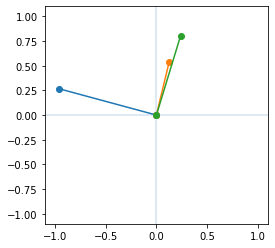

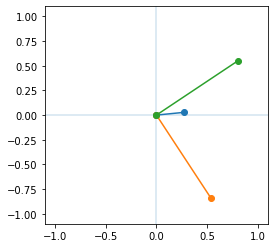

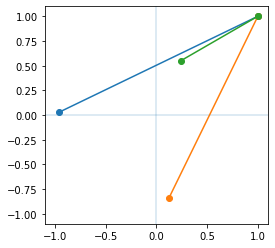

In [140]:
plt.figure(figsize=(4, 4))
for i in range(len(v)):
  plt.xlim((-1.1, 1.1))
  plt.ylim((-1.1, 1.1))
  plt.axvline(0, lw=0.1)
  plt.axhline(0, lw=0.1)
  plt.plot([0, v[i, 0]], [0, v[i, 1]], '-o')
plt.show()

plt.figure(figsize=(4, 4))
for i in range(len(v)):
  plt.xlim((-1.1, 1.1))
  plt.ylim((-1.1, 1.1))
  plt.axvline(0, lw=0.1)
  plt.axhline(0, lw=0.1)
  plt.plot([0, v[i, 1]], [0, v[i, 2]], '-o')
plt.show()

plt.figure(figsize=(4, 4))
for i in range(len(v)):
  plt.xlim((-1.1, 1.1))
  plt.ylim((-1.1, 1.1))
  plt.axvline(0, lw=0.1)
  plt.axhline(0, lw=0.1)
  plt.plot([1, v[i, 0]], [1, v[i, 2]], '-o')
plt.show()

3. Find a matrix with the same eigenvectors but different eigenvalues.






In [141]:
M2 = [
      [-4/4,1/4,2/4],
      [1/4,5/4,-1/4],
      [2/4,-1/4,4/4]
]
l2, v2 = la.eig(M2)
print(f"Eigenvalues: {l2}")
print(f"Eigenvectors:\n{v2}")
print()
if (l == l2).all(): 
    print ("The Eigenvalues are identical") 
else : 
    print ("The Eigenvalues are not identical")

if (v == v2).all(): 
    print ("The Eigenvectors are identical") 
else : 
    print ("The Eigenvectors are not identical")



Eigenvalues: [-1.15586885  1.          1.40586885]
Eigenvectors:
[[-0.96324361  0.26726124  0.02707729]
 [ 0.12481118  0.53452248 -0.83588748]
 [ 0.23787375  0.80178373  0.54823256]]

The Eigenvalues are not identical
The Eigenvectors are identical


4. Find a matrix with the same eigenvalues but different eigenvectors.

In [142]:
sum_values = 0
for i in range(0,len(v)):
  sum_values += v[i][i]

M3 = [ [l[0], 0, 0],
       [ 0, l[1], 0],
       [ 0, 0, l[2]]
]

l3, v3 = la.eig(M3)
print(f"Eigenvalues: {l3}")
print(f"Eigenvectors:\n{v3}")
print()
if (l == l3).all(): 
    print ("The Eigenvalues are identical") 
else : 
    print ("The Eigenvalues are not identical")

if (v == v3).all(): 
    print ("The Eigenvectors are identical") 
else : 
    print ("The Eigenvectors are not identical")



Eigenvalues: [-4.62347538  4.          5.62347538]
Eigenvectors:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

The Eigenvalues are identical
The Eigenvectors are not identical


5. Write a function that, given a list of eigenvalues, returns a matrix with those eigenvalues. Example:

```
>> eigenvalues_to_matrix([0, 2])
[[1, -1],
 [-1, 1]]
```

Demonstrate the function on 1, 3, and 6-dimensional arguments (for example, `egienvalues_to_matrix([1])`, `eigenvalues_to_matrix([1, 5, 3])`, eigenvalues_to_matrix([-3, 0, -1, 5, 2.5, 0.3]).

In [143]:
def eigenvalues_to_matrix(eigen_values):
  matrix = [] # creating square matrix ( len(eigen_values) x len(eigen_values) )
  for i in range(0,len(eigen_values)):        
    a =[] 
    for j in range(0,len(eigen_values)):     
        a.append(0) 
    matrix.append(a)
  for i in range(0,len(eigen_values)):
    matrix[i][i] = eigen_values[i]
  return matrix

def check_matrix_eigenvalues(matrix,eigenvalues):
  l, v = la.eig(matrix)
  print(f"Matrix Eigenvalues: {l}")
  if (eigenvalues == l).all(): 
      print ("The Eigenvalues are identical") 
  else : 
      print ("The Eigenvalues are not identical")

def print_matrix(matrix):
  s = [[str(e) for e in row] for row in matrix]
  lens = [max(map(len, col)) for col in zip(*s)]
  fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
  table = [fmt.format(*row) for row in s]
  print ('\n'.join(table))
  print()



eigenvalues_example = [0, 2]
matrix = eigenvalues_to_matrix(eigenvalues_example)
print(f"Input Eigenvalues: {eigenvalues_example}")
print("printing matrix:")
print_matrix(matrix)
print("check function result:")
check_matrix_eigenvalues(matrix,eigenvalues_example)
print("\n------------------------------------------")

eigenvalues_1 = [1]
matrix = eigenvalues_to_matrix(eigenvalues_1)
print(f"Input Eigenvalues: {eigenvalues_1}")
print("printing matrix:")
print_matrix(matrix)
print("check function result:")
check_matrix_eigenvalues(matrix,eigenvalues_1)
print("\n------------------------------------------")

eigenvalues_3 = [1, 5, 3]
matrix = eigenvalues_to_matrix(eigenvalues_3)
print(f"Input Eigenvalues: {eigenvalues_3}")
print("printing matrix:")
print_matrix(matrix)
print("check function result:")
check_matrix_eigenvalues(matrix,eigenvalues_3)
print("\n------------------------------------------")

eigenvalues_6 = [-3, 0, -1, 5, 2.5, 0.3]
matrix = eigenvalues_to_matrix(eigenvalues_6)
print(f"Input Eigenvalues: {eigenvalues_6}")
print("printing matrix:")
print_matrix(matrix)
print("check function result:")
check_matrix_eigenvalues(matrix,eigenvalues_6)




Input Eigenvalues: [0, 2]
printing matrix:
0	0
0	2

check function result:
Matrix Eigenvalues: [0. 2.]
The Eigenvalues are identical

------------------------------------------
Input Eigenvalues: [1]
printing matrix:
1

check function result:
Matrix Eigenvalues: [1.]
The Eigenvalues are identical

------------------------------------------
Input Eigenvalues: [1, 5, 3]
printing matrix:
1	0	0
0	5	0
0	0	3

check function result:
Matrix Eigenvalues: [1. 5. 3.]
The Eigenvalues are identical

------------------------------------------
Input Eigenvalues: [-3, 0, -1, 5, 2.5, 0.3]
printing matrix:
-3	0	0 	0	0  	0  
0 	0	0 	0	0  	0  
0 	0	-1	0	0  	0  
0 	0	0 	5	0  	0  
0 	0	0 	0	2.5	0  
0 	0	0 	0	0  	0.3

check function result:
Matrix Eigenvalues: [-3.   0.  -1.   5.   2.5  0.3]
The Eigenvalues are identical


## Question 2: Google PageRank

A directed graph $G$ is given:

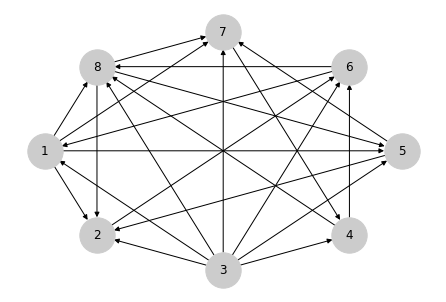

1. Write adjacency matrix $A$ for $G$.

In [144]:
A = np.array([
    [0, 0, 1, 0, 0, 1, 0, 0],
    [1, 0, 1, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0],
    [1, 0, 1, 0, 0, 0, 0, 1],
    [0, 1, 1, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 0, 1, 0, 0]
])


2. Compute Google PageRank of all nodes in $G$. Plot the graph with node sizes proportional to the ranks.

[0.10334653 0.13517468 0.01875    0.13592527 0.09485943 0.19369351
 0.13517468 0.1830759 ]


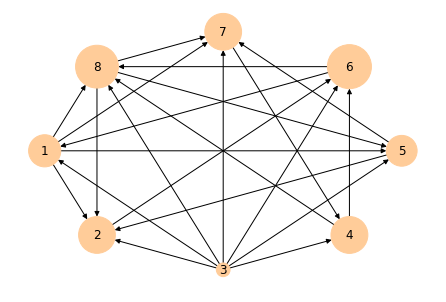

In [145]:
def plot_graph(A, node_size=1/A.shape[0], node_color="#ccc"):
    g = nx.from_numpy_matrix(A.T, create_using=nx.DiGraph())
    nx.draw_shell(g, labels=dict((i, str(i+1)) for i in g.nodes), arrows=True,
                     node_size=10000*node_size, node_color=node_color)

def pagerank_iterative(A, num_iterations, d=0.85):
    """PageRank: The trillion dollar algorithm.

    Parameters
    ----------
    A : numpy array
        adjacency matrix where A_i,j represents the link from 'j' to 'i', 
        such that for all 'j' sum(i, A_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = A.shape[1]
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    for i in range(num_iterations):
        v = d * A @ v + (1 - d)/N
    return v[:,0]


A1 = A/np.sum(A, axis=0)
#plot_graph(A, node_color="#9cf")

vi = pagerank_iterative(A1, 10000,  d=0.85)
plot_graph(A1, node_color='#fc9', node_size=vi)
print(vi)

3. Change the graph edges (the adjacency matrix) such that node 1 has the highest rank. Plot the changed graph with node sizes proportional to the ranks.

[0.19369351 0.1830759  0.13592527 0.13517468 0.13517468 0.10334653
 0.09485943 0.01875   ]


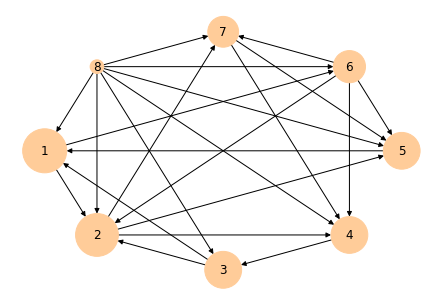

In [146]:
#Changing the graph edges (the adjacency matrix) manually such that node 1 has the highest rank.
#And Ploting the changed graph with node sizes proportional to the ranks.
B = np.array([ 
      [0, 0, 1, 0, 1, 0, 0, 1],
      [1, 0, 1, 0, 0, 1, 0, 1],
      [0, 0, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 0, 0, 1, 1, 1],
      [0, 1, 0, 0, 0, 1, 1, 1],
      [1, 0, 0, 0, 0, 0, 0, 1],
      [0, 1, 0, 0, 0, 1, 0, 1],
      [0, 0, 0, 0, 0, 0, 0, 0]
])
B2 = B/np.sum(B, axis=0)
vi = pagerank_iterative(B2, 10000,  d=0.85)
print(vi)
plot_graph(B2, node_color='#fc9', node_size=vi)

4. Invert the direction of all edges in G. Compute the PageRank and plot the inverted graph with node sizes proportional to the ranks.

[0.05218031 0.03293696 0.70952497 0.04208197 0.03353401 0.05007164
 0.03663484 0.04303531]
[0.03293696358629797, 0.03353400739345979, 0.03663483591233633, 0.042081966852556066, 0.0430353094882734, 0.050071636186933985, 0.0521803127545315, 0.709524967825611]


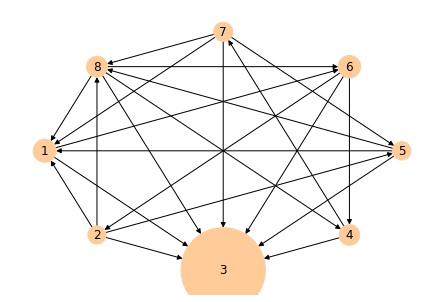

In [147]:
# inverting manually the direction of all edges in G
C = np.array([
    [0, 1, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 0, 1],
    [0, 1, 0, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 0]
])

C2 = C/np.sum(C, axis=0)

vi = pagerank_iterative(C2, 100,  d=0.85)
print(vi)
print(sorted(vi))
plot_graph(C2, node_color='#fc9', node_size=vi)


[0.70952497 0.05218031 0.05007164 0.04303531 0.04208197 0.03663484
 0.03353401 0.03293696]


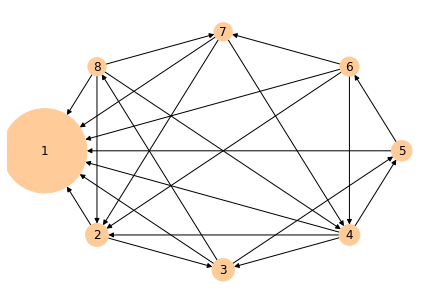

In [151]:
#plot the inverted graph with node sizes proportional to the ranks
D = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 1, 0, 1, 1, 1],
    [0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1] ,
    [0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 1, 0, 0, 0, 0, 0]
])

D2 = D/np.sum(D, axis=0)

vi = pagerank_iterative(D2, 100,  d=0.85)
print(vi)

plot_graph(D2, node_color='#fc9', node_size=vi)

5. How many iterations of iterative PageRank algorithm are required to approximate the exact (algebraic) PageRank algorithm with 0.01% accuracy?

va:
[0.10334653 0.13517468 0.01875    0.13592527 0.09485943 0.19369351
 0.13517468 0.1830759 ]
vi:
[0.1033456  0.13517499 0.01875    0.13592659 0.09485909 0.19369433
 0.13517499 0.18307441]
28 iterations of iterative PageRank algorithm are required to approximate the exact (algebraic) PageRank algorithm with 0.004% accuracy


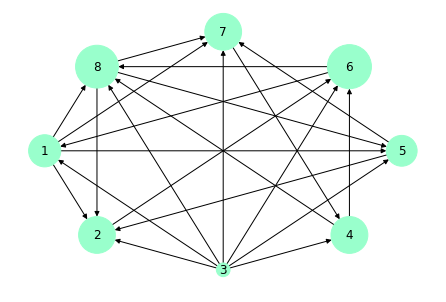

In [153]:
def pagerank_algebraic(A, d=0.85):
    """PageRank: The trillion dollar algorithm.

    Parameters
    ----------
    A : numpy array
        adjacency matrix where A_i,j represents the link from 'j' to 'i',
        such that for all 'j' sum(i, A_i,j) = 1
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = A.shape[0]
    return  la.inv(np.eye(N) - d * A) @ ((1-d)/N*np.ones(N).T)

va = pagerank_algebraic(A1)
plot_graph(A1, node_color='#9fc', node_size=va)
print("va:")
print(va)
iterations_of_iterative = 28
vi = pagerank_iterative(A1, iterations_of_iterative,  d=0.85)
print("vi:")
print(vi)
# calculating percantage accuracy by norm L1
#Also known as Manhattan Distance or Taxicab norm.
#L1 Norm is the sum of the magnitudes of the vectors in a space. 
#It is the most natural way of measure distance between vectors, 
#that is the sum of absolute difference of the components of the vectors.
#In this norm, all the components of the vector are weighted equally.


accuracy_percentage = la.norm((va-vi)/va*100,ord=1)
print(iterations_of_iterative,"iterations of iterative PageRank algorithm are required to approximate the exact (algebraic) PageRank algorithm with {:0.3f}% accuracy".format(accuracy_percentage))
